# **Introduction**

This project involves the creation and evaluation of a procedural content generation approach designed to generate levels for a 2D, tile-based puzzle game, Rush Hour. The project leverages N-gram Markov Chain models to learn from existing level designs and generate new, playable levels that maintain the characteristics of the training dataset. This approach aims to automate the level design process, ensuring a continuous supply of fresh and engaging content for players.


# **Context**

N-gram Markov Chains have been widely used in text generation and have seen applications in various content generation contexts, including level design for games, behavioral modeling to understand news consumption patterns, and creating industrial simulation in the fabrication sector [Vermeer, S., et al. (2020) Mubarak, A. A., et al. (2018)] . Similar approaches have been applied in music generation based on user mood [Ramanto, A. S., et al. (2017).] . Recent work has utilized the Markov chain for creative ideation where a comparison was done with GPT-generated and Markov chain-generated content. In this work, I explore using Markov models for the procedural generation of puzzle game content, specifically for Rush Hour. This work is a replication of prior work using Markov chains for modeling and generating playable content across multiple game genres . The goal is to demonstrate the viability of Markov models for automating the creation of novel and solvable Rush Hour levels without hand-authored content or puzzles.


# The training data consisted of levels from the 2D, tile-based puzzle game Rush Hour. Each level was encoded as a string, with characters representing different tiles and game elements:
*

*   'o' for empty grid cells
*   'x' for wall tiles
*   'A' for the primary red car
*   'B' - 'Z' for other vehicle tiles




To preprocess the data, each level string was converted into a 6x6 2D array representing the puzzle grid. Each sublist in the 2D array corresponds to one row in the grid.





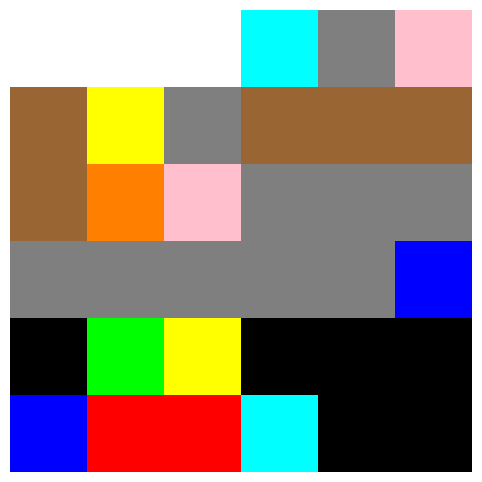

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the level string
level_string = "EEEJoHCGoCCCCKLooooooooIDFGDDDIAAJDD"

# Define RGB colors for each tile type

tile_to_rgb = {
    "E": (1, 1, 1),    # White (Empty space)
    "o": (0.5, 0.5, 0.5), # Grey (Generic obstacle)
    "A": (1, 0, 0),    # Red (Player character or special item)
    "J": (0, 1, 1),    # Cyan (Changed color for 'J')
    "x": (0.5, 0, 0),  # Maroon (New color for 'x')
    "I": (0, 0, 1),    # Blue (Enemy or hazard)
    "F": (0, 1, 0),    # Green (Collectible or goal)
    "G": (1, 1, 0),    # Yellow (Power-up)
    "C": (0.6, 0.4, 0.2), # Brown (Platform or ground)
    "D": (0, 0, 0),    # Black (Pit or lethal hazard)
    "M": (0.5, 0, 0.5), # Purple (Movable object)
    "K": (1, 0.5, 0),  # Orange (Added color for 'K')
    # Default color for any undefined tiles
    "default": (1, 0.75, 0.8) # Pinkish as default
}


# Convert the level string into a 2D array of RGB values
level_height = 6  # Assuming the level is 6 tiles high based on the example provided
level_width = len(level_string) // level_height
level_array_rgb = np.array([tile_to_rgb.get(tile, tile_to_rgb["default"]) for tile in level_string]).reshape(level_height, level_width, 3)

# Create a figure showing the level
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.imshow(level_array_rgb)
plt.axis('off')  # Hide the axes
plt.show()


# Model Training

To capture sequential dependencies between tiles, n-gram features were extracted from the preprocessed 2D grid data. A 3rd order Markov model (n=3) was chosen to model the probability of a tile type given the previous 3 tile types.

The training process involved:

1.   Sliding a 3-tile window across each row of each level grid to extract all possible 3-gram sequences of tile types.
2.   Counting the occurrences of each unique 3-gram sequence.
1.   Calculating the conditional probabilities of a tile type appearing after each possible 3-gram. For example, if "wall, empty, car" appears 10 times, and in 8 of those cases the next tile is "empty", the probability would be P("empty" | "wall, empty, car") = 8/10.
2.   These conditional probabilities were stored in a transition probability matrix. Each row represents a given 3-gram context, each column a possible next tile type, and the matrix values are the probabilities.

1. At test time, the model can generate a new level by sampling from the transition probability distribution for a given 3-gram context. This Markov approach aims to learn the tile patterns and sequences that appear within Rush Hour puzzle configurations.  













# Content Generated
To generate new puzzle levels, the trained 3rd-order Markov model was seeded with an initial 2-tile sequence and used to probabilistically predict subsequent tiles.  An initial tile bigram (sequence of 2 tiles) was manually specified as the starting seed. The model looked up the transition probability distribution for that 2-gram context. The next tile was sampled from that probability distribution. This new 3-gram was then fed back into the model to predict the following tile. This iterative process of sampling and feeding back the updated context was repeated until a sequence of the desired length was generated.

Apart from using different training examples, controlling the generator can involve adjusting the initial conditions, modifying the N-gram size, or applying post-generation checks to ensure the levels meet certain criteria (e.g., solvability, and complexity).  


In [ ]:
from collections import Counter

def load_levels(file_path):
    with open(file_path, 'r') as file:
        levels = [line.strip() for line in file.readlines()]
    return levels

# Load levels from a text file
file_path = "/content/generated_rush_hour_puzzles.txt"  # Replace this with the actual file path
levels = load_levels(file_path)

# Print out the loaded levels
print("Loaded levels:")
for level in levels:
    print(level)

# Count the variety and frequency of different tiles (excluding 'E' for empty spaces)
tile_counter = Counter()
for level in levels:
    # Update the counter with tiles from the current level, ignoring 'E'
    tile_counter.update([tile for tile in level if tile != 'E'])

# Output the results
print("\nTile frequency across all levels:")
for tile, count in tile_counter.items():
    print(f"{tile}: {count}")

print(f"\nUnique tile types: {len(tile_counter.keys())}")
print(f"Total non-empty tiles across all levels: {sum(tile_counter.values())}")


Loaded levels:
ooxCCCoJDDoKooGCCKFooooxoIEEMFFoJooI
oooHIIoLMHGGooIDDKMFFFGGKoAAJooJooGB
oooNIoLooJoFFxHoooAAoJKooAAKLGCCGAAo
oooIAAHIooIFFMJEEIooOIIoKoMGHIoJKLAA
ooIBBCCCJLMGGGGoHIAAMHoJoCCoKLAAGJoL
ooHHIEExoooKFFGoIJLMHFFMxHIAAKDDEEEo
ooKDDKoLooLMEELMoHDDoKoooJFFLGDDGEEF
oooxxIIIoooHBBKoxKoNIooooICCMoIJooIo
ooJAAMoOIJLMHAAGHHKIIxLoNIoKAAIoJoCC
ooJEEJLNoCCCoJAAoKoGGGKoxDDoLHCCxAAK
ooxJoooIKDDDEEoooKEEELHDDoKooJKLNDDK
ooooJoLJJJooLoNEEoFFOxIIIoJFFJooIoox
ooIoLDDMHoooGGoHooMNxHIIIoAAoHFFIooo
ooKEEIoJoFFKMoDDLGDDLooLoooooNKAAMIo
oooooAAJoKLMEEKooIJoLoMGGGGHoIEEKLMN
ooIJoLNooFFxoLAAJKoLGAAKoMDDMHoJEELM
ooHBBGooAAIJKEEELFFoKCCLMNIGGHFFGGxI
oooooGoHBBBBHIKFGGoJoxxKoooKooIoLGGH
ooxDDGEEoAAJKoMNooJooKDDKLooooHEEoIJ
ooKLDDJLGGGGJoLMooIEELFFNIJLMDDoEEEL
oooKCCLNEEFFoLFFFoGGMoNKIILJJOoKLMGG
oooIGGoLGGGJKoNGGoIKMooNooxHHIIOKxFF
ooLAAKooMHAAKoLMAAKooxGGLMoooHoJLoNx
ooIDDoLGoMooIBBKCCGDDoJoAAIoJDDooFFJ
ooHDDKMFHGGKooHEEoooMJFFoHAANKoAAoLN
ooHIoLMFFFFFKoMGIooNGDDKoooooooJKFoK
ooooJKMFFKGoHEEKooKLGoI

# Evaluation
The generated levels were evaluated based on their expressive range only. The expressive range was quantified by analyzing the diversity and frequency of tile types across the generated levels. A quantitative analysis of the expressive range showed a significant variety of tile types, indicating a broad spectrum of level designs (Figure 2). 16 unique tiles were generated and there were a total of 3371 non-empty tiles across 100 levels.   


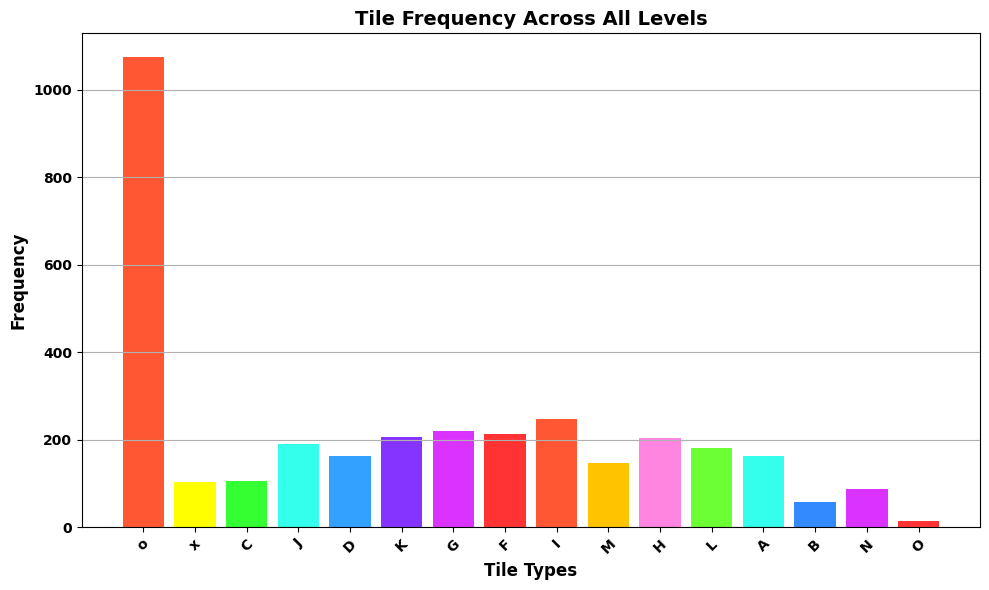

In [ ]:
import matplotlib.pyplot as plt

# Provided data
tile_data = {
    'o': 1075,
    'x': 102,
    'C': 105,
    'J': 189,
    'D': 162,
    'K': 207,
    'G': 220,
    'F': 213,
    'I': 248,
    'M': 147,
    'H': 203,
    'L': 180,
    'A': 162,
    'B': 57,
    'N': 87,
    'O': 14
}

# Extracting tile types and their frequencies
tiles = list(tile_data.keys())
frequencies = list(tile_data.values())

# Define brighter colors for each bar
colors = ['#FF5733', '#FFFF00', '#33FF33', '#33FFEC', '#33A1FF', '#8533FF', '#DB33FF', '#FF3333',
          '#FF5733', '#FFC300', '#FF85E1', '#6CFF33', '#33FFEC', '#338AFF', '#DB33FF', '#FF3333']

# Creating the bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(tiles, frequencies, color=colors)

# Adding labels and title
plt.xlabel('Tile Types', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Tile Frequency Across All Levels', fontsize=14, fontweight='bold')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Bolden the tick labels
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Adding grid for better readability
plt.grid(axis='y')

# Displaying the plot
plt.tight_layout()
plt.show()


# Generated Content Examples

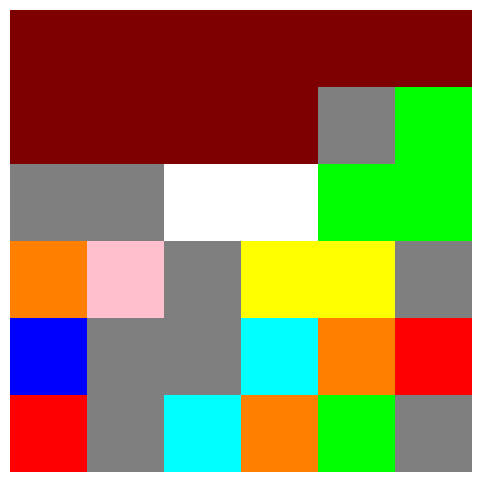

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the level string
level_string = "xxxxxxxxxxoFooEEFFKLoGGoIooJKAAoJKFo"

# Define RGB colors for each tile type

tile_to_rgb = {
    "E": (1, 1, 1),    # White (Empty space)
    "o": (0.5, 0.5, 0.5), # Grey (Generic obstacle)
    "A": (1, 0, 0),    # Red (Player character or special item)
    "J": (0, 1, 1),    # Cyan (Changed color for 'J')
    "x": (0.5, 0, 0),  # Maroon (New color for 'x')
    "I": (0, 0, 1),    # Blue (Enemy or hazard)
    "F": (0, 1, 0),    # Green (Collectible or goal)
    "G": (1, 1, 0),    # Yellow (Power-up)
    "C": (0.6, 0.4, 0.2), # Brown (Platform or ground)
    "D": (0, 0, 0),    # Black (Pit or lethal hazard)
    "M": (0.5, 0, 0.5), # Purple (Movable object)
    "K": (1, 0.5, 0),  # Orange (Added color for 'K')
    # Default color for any undefined tiles
    "default": (1, 0.75, 0.8) # Pinkish as default
}


# Convert the level string into a 2D array of RGB values
level_height = 6  # Assuming the level is 6 tiles high based on the example provided
level_width = len(level_string) // level_height
level_array_rgb = np.array([tile_to_rgb.get(tile, tile_to_rgb["default"]) for tile in level_string]).reshape(level_height, level_width, 3)

# Create a figure showing the level
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.imshow(level_array_rgb)
plt.axis('off')  # Hide the axes
plt.show()
